In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Time Gap Plotter

This notebook is designed to be run on the output of the following scripts:
- `dt_extractor.py`: takes in a list of l3 processed root files from the IceTop 11-year anisotropy analysis, returns a combined histogram of the time gaps within runs and the start and stop time of each run
- `dt_maker.py`: submits `dt_extractor` en masse over the 11-year dataset
- `dt_merger.py`: merges the output histograms into one, combined file, including the calculated time gaps from between runs

The result of the three scripts above (run in this order) is a single, saved histogram which contains _all_ the time gaps (within runs + between runs) from the 11-year dataset.

In [2]:
def plot_hist(hist_file):

    with open(hist_file, 'r') as f:
        data = json.load(f)

    h_values = data['hist']
    run_values = data['run_hist']
    bins = np.array(data['bins'])

    # Data saved in log_10(MJD) -> convert to seconds
    bins = np.log10(10**bins * 86400)
    bin_centers = (bins[:-1] + bins[1:])/2.
    
    fig, ax = plt.subplots()
    ax.step(bin_centers, h_values, label=r'in-run $\delta t$')
    ax.step(bin_centers, run_values, label=r'between-run $\delta t$')
    ax.set_yscale('log')
    ax.set_xlabel(r'$\log_{10} \delta t$ (s)')
    ax.set_ylabel('Counts')
    ax.legend()
    plt.show()

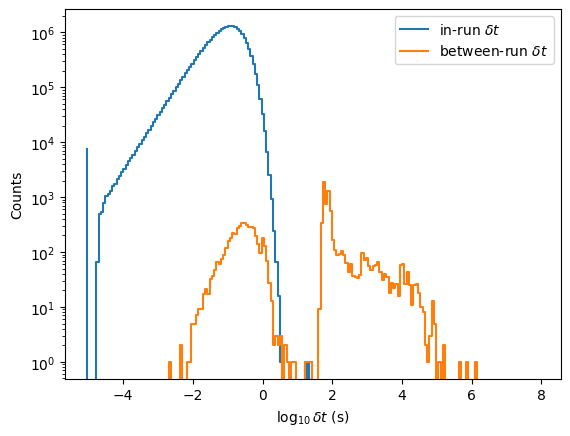

In [3]:
out_dir = '/data/user/fmcnally/stability/icetop_dt'
hist_file = f'{out_dir}/hist_combined.json'
plot_hist(hist_file)

We can also ask: "what percentage of our events have more than a given time gap?" To answer this question, we can look at a normalized cumulative histogram of all our δt's. They're shown here twice --- once with the percentage of events _less_ than a given δt, and once with the percentage of events _greater_ than a given δt

In [7]:
# Goal: cumulative histogram showing percentage of events with δt < value
def cumulative_hist(hist_file, greater_than=False):

    with open(hist_file, 'r') as f:
        data = json.load(f)

    h_values = np.asarray(data['hist'])
    h_values += data['run_hist']
    h_values = np.cumsum(h_values, dtype='float')
    h_values /= h_values.max()

    # Optionally plot the number of events greater than some δt
    if greater_than:
        h_values = 1 - h_values
    
    bins = np.array(data['bins'])

    # Data saved in log_10(MJD) -> convert to seconds
    bins = np.log10(10**bins * 86400)
    bin_centers = (bins[:-1] + bins[1:])/2.
    
    fig, ax = plt.subplots()
    ax.step(bin_centers, h_values)
    ax.set_yscale('log')
    ax.set_xlabel(r'$\log_{10} \delta t$ (s)')
    ax.set_ylabel(r'Fraction of events less than $\delta t$')
    if greater_than:
        ax.set_ylabel(r'Fraction of events greater than $\delta t$')
    plt.show()

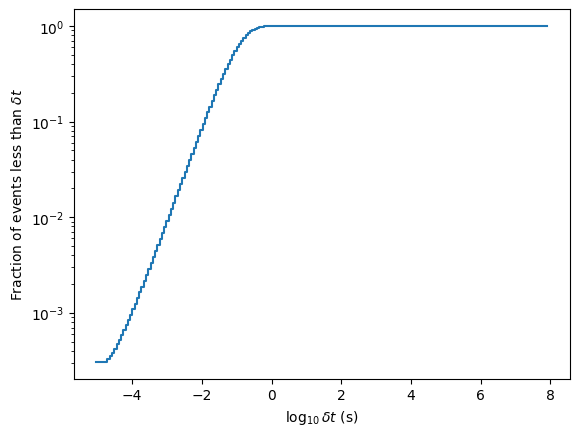

In [8]:
cumulative_hist(hist_file)

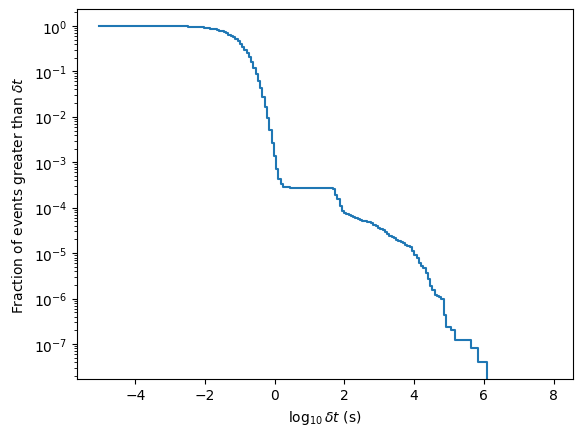

In [9]:
cumulative_hist(hist_file, greater_than=True)